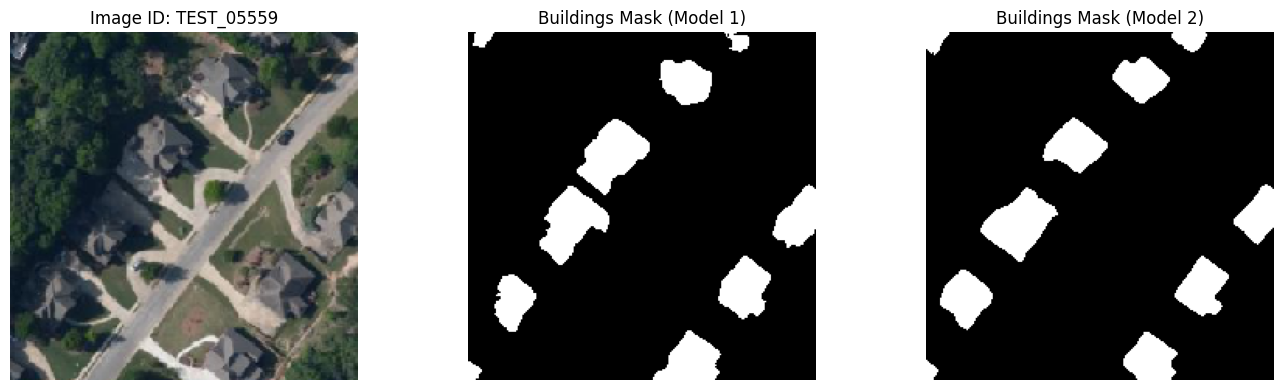

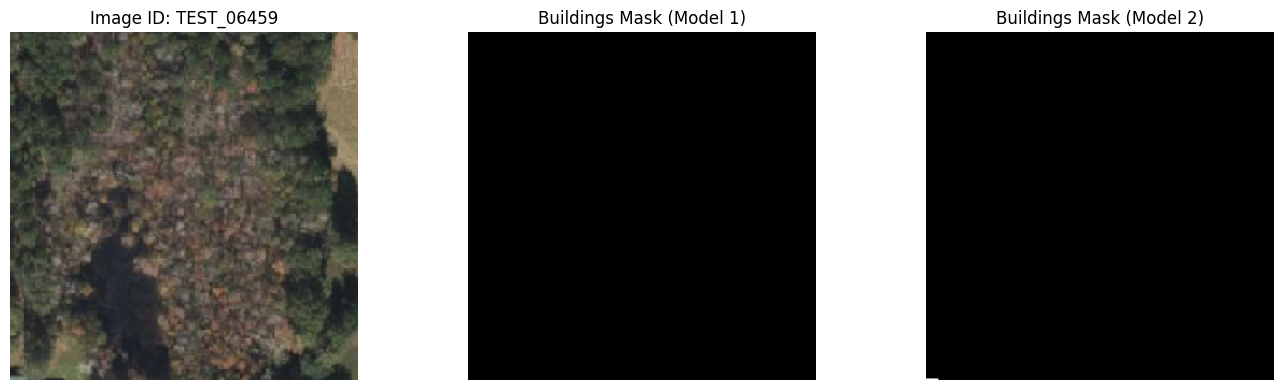

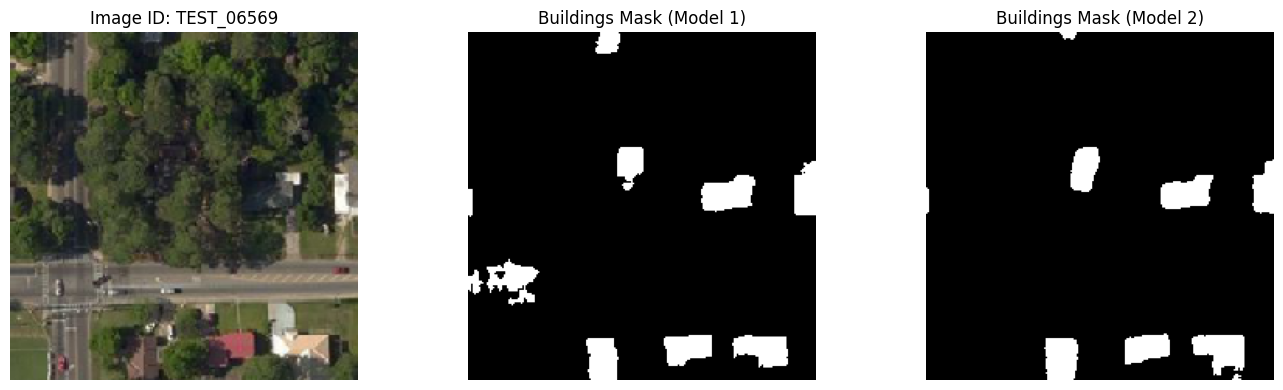

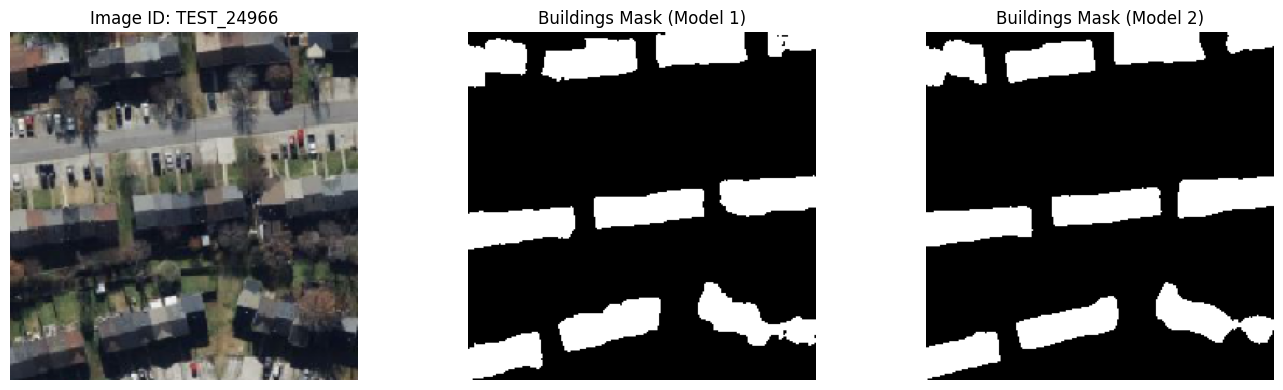

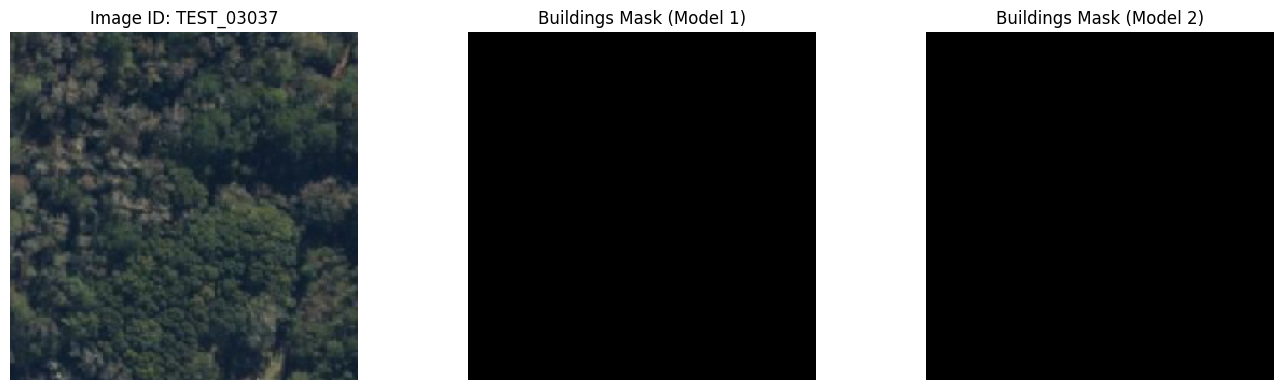

In [5]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

def rle_decode(mask_rle, shape):
    """
    RLE 형식의 마스크를 디코딩하여 2D 배열 형태의 마스크로 변환합니다.

    Args:
        mask_rle (str): RLE 형식의 마스크 데이터
        shape (tuple): 마스크의 형태 (높이, 너비)

    Returns:
        np.ndarray: 2D 배열 형태의 마스크
    """
    if mask_rle == '-1':
        return np.zeros(shape, dtype=np.uint8)  # -1일 경우 검은 화면 반환

    mask = np.zeros(shape[0] * shape[1], dtype=np.uint8)
    rle_pairs = np.array(mask_rle.split(), dtype=int).reshape(-1, 2)
    for start, length in rle_pairs:
        start -= 1  # RLE는 1부터 시작하므로 0부터 시작하도록 보정합니다.
        mask[start:start + length] = 1
    mask = mask.reshape((shape[0], shape[1]))
    return mask

# CSV 파일 경로
csv_file_path1 = './submitsum_re.csv'
csv_file_path2 = './submit2.csv'

# 이미지가 저장된 폴더 경로
image_folder = 'test_img'  # 이미지가 저장된 폴더 경로

# CSV 파일 로드
data1 = pd.read_csv(csv_file_path1)
data2 = pd.read_csv(csv_file_path2)

# 선택할 이미지 개수
num_images = 5

# 랜덤하게 이미지 선택
selected_indices = np.random.choice(len(data1), num_images, replace=False)
selected_data1 = data1.iloc[selected_indices]
selected_data2 = data2.iloc[selected_indices]

# 선택된 이미지를 순회하며 시각화
for idx, (row1, row2) in enumerate(zip(selected_data1.iterrows(), selected_data2.iterrows())):
    _, row1 = row1
    _, row2 = row2
    img_id1 = row1['img_id']
    img_id2 = row2['img_id']
    mask_rle1 = row1['mask_rle']
    mask_rle2 = row2['mask_rle']

    # 이미지 파일 경로
    image_path = os.path.join(image_folder, f'{img_id1}.png')

    # 이미지 로드
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # 첫 번째 마스크 디코딩
    mask1 = rle_decode(mask_rle1, image.shape[:2])

    # 두 번째 마스크 디코딩
    mask2 = rle_decode(mask_rle2, image.shape[:2])

    # 이미지와 마스크를 matplotlib로 표시
    fig, axes = plt.subplots(1, 3, figsize=(14, 4))
    axes[0].imshow(image)
    axes[0].set_title(f"Image ID: {img_id1}")
    axes[0].axis('off')
    axes[1].imshow(mask1, cmap='gray')
    axes[1].set_title("Buildings Mask (Model 1)")
    axes[1].axis('off')
    axes[2].imshow(mask2, cmap='gray')
    axes[2].set_title("Buildings Mask (Model 2)")
    axes[2].axis('off')
    plt.tight_layout()
    plt.show()
